# Random Forests using the NB features for API data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

The csv files are the api data for train (before 31OCT2017) and test (after 31OCT2017). They were generated by running export_nb_dataset.sas

In [ ]:
#FIFTHTHIRDCS DATA
# df_train = pd.io.parsers.read_csv('/home/lijli06/Work/Bayes/HSBC/data/june_data.csv',encoding='latin-1')
df_train = pd.io.parsers.read_csv('/home/lijli06/Work/Bayes/FIFTHTHIRD/data/train_data.csv',encoding='latin-1')
df_test = pd.io.parsers.read_csv('/home/lijli06/Work/Bayes/FIFTHTHIRD/data/test_data.csv',encoding='latin-1')

# orgCols = df_train.columns
print(df_train.columns)

In [3]:
#create a distribution of merchant data fields with fraud tag
#train data
acqbin_f = df_train.groupby(['fiacq_acqbin'])['mdtag_athctxn'].sum()
acqbin_nf = df_train.groupby(['fiacq_acqbin'])['mdtag_athctxn'].count() - df_train.groupby(['fiacq_acqbin'])['mdtag_athctxn'].sum()
acqbin_fr = acqbin_f/df_train['mdtag_athctxn'].sum()
acqbin_nfr = acqbin_nf/(len(df_train['mdtag_athctxn'])-df_train['mdtag_athctxn'].sum())

df_train = df_train.join(acqbin_fr, on='fiacq_acqbin', rsuffix='_1')
df_train = df_train.join(acqbin_nfr, on='fiacq_acqbin', rsuffix='_0')
df_train.rename(index=str, columns={'mdtag_athctxn_0': 'acqbin_0', 'mdtag_athctxn_1': 'acqbin_1'}, inplace=True)
# df_train[['fiacq_acqbin', 'acqbin_0', 'acqbin_1']].head()

url_f = df_train.groupby(['txmer_merurl'])['mdtag_athctxn'].sum()
url_nf = df_train.groupby(['txmer_merurl'])['mdtag_athctxn'].count() - df_train.groupby(['txmer_merurl'])['mdtag_athctxn'].sum()
url_fr = url_f/df_train['mdtag_athctxn'].sum()
url_nfr = url_nf/(len(df_train['mdtag_athctxn'])-df_train['mdtag_athctxn'].sum())

df_train = df_train.join(url_fr, on='txmer_merurl', rsuffix='_1')
df_train = df_train.join(url_nfr, on='txmer_merurl', rsuffix='_0')
df_train.rename(index=str, columns={'mdtag_athctxn_0': 'url_0', 'mdtag_athctxn_1': 'url_1'}, inplace=True)

mname_f = df_train.groupby(['txmer_mername'])['mdtag_athctxn'].sum()
mname_nf = df_train.groupby(['txmer_mername'])['mdtag_athctxn'].count() - df_train.groupby(['txmer_mername'])['mdtag_athctxn'].sum()
mname_fr = mname_f/df_train['mdtag_athctxn'].sum()
mname_nfr = mname_nf/(len(df_train['mdtag_athctxn'])-df_train['mdtag_athctxn'].sum())

df_train = df_train.join(mname_fr, on='txmer_mername', rsuffix='_1')
df_train = df_train.join(mname_nfr, on='txmer_mername', rsuffix='_0')
df_train.rename(index=str, columns={'mdtag_athctxn_0': 'mname_0', 'mdtag_athctxn_1': 'mname_1'}, inplace=True)

merid_f = df_train.groupby(['txmer_merid'])['mdtag_athctxn'].sum()
merid_nf = df_train.groupby(['txmer_merid'])['mdtag_athctxn'].count() - df_train.groupby(['txmer_merid'])['mdtag_athctxn'].sum()
merid_fr = merid_f/df_train['mdtag_athctxn'].sum()
merid_nfr = merid_nf/(len(df_train['mdtag_athctxn'])-df_train['mdtag_athctxn'].sum())

df_train = df_train.join(merid_fr, on='txmer_merid', rsuffix='_1')
df_train = df_train.join(merid_nfr, on='txmer_merid', rsuffix='_0')
df_train.rename(index=str, columns={'mdtag_athctxn_0': 'merid_0', 'mdtag_athctxn_1': 'merid_1'}, inplace=True)


In [4]:
#test data
acqbin_f = df_test.groupby(['fiacq_acqbin'])['mdtag_athctxn'].sum()
acqbin_nf = df_test.groupby(['fiacq_acqbin'])['mdtag_athctxn'].count() - df_test.groupby(['fiacq_acqbin'])['mdtag_athctxn'].sum()
acqbin_fr = acqbin_f/df_test['mdtag_athctxn'].sum()
acqbin_nfr = acqbin_nf/(len(df_test['mdtag_athctxn'])-df_test['mdtag_athctxn'].sum())

df_test = df_test.join(acqbin_fr, on='fiacq_acqbin', rsuffix='_1')
df_test = df_test.join(acqbin_nfr, on='fiacq_acqbin', rsuffix='_0')
df_test.rename(index=str, columns={'mdtag_athctxn_0': 'acqbin_0', 'mdtag_athctxn_1': 'acqbin_1'}, inplace=True)
# df_test[['fiacq_acqbin', 'acqbin_0', 'acqbin_1']].head()

url_f = df_test.groupby(['txmer_merurl'])['mdtag_athctxn'].sum()
url_nf = df_test.groupby(['txmer_merurl'])['mdtag_athctxn'].count() - df_test.groupby(['txmer_merurl'])['mdtag_athctxn'].sum()
url_fr = url_f/df_test['mdtag_athctxn'].sum()
url_nfr = url_nf/(len(df_test['mdtag_athctxn'])-df_test['mdtag_athctxn'].sum())

df_test = df_test.join(url_fr, on='txmer_merurl', rsuffix='_1')
df_test = df_test.join(url_nfr, on='txmer_merurl', rsuffix='_0')
df_test.rename(index=str, columns={'mdtag_athctxn_0': 'url_0', 'mdtag_athctxn_1': 'url_1'}, inplace=True)

mname_f = df_test.groupby(['txmer_mername'])['mdtag_athctxn'].sum()
mname_nf = df_test.groupby(['txmer_mername'])['mdtag_athctxn'].count() - df_test.groupby(['txmer_mername'])['mdtag_athctxn'].sum()
mname_fr = mname_f/df_test['mdtag_athctxn'].sum()
mname_nfr = mname_nf/(len(df_test['mdtag_athctxn'])-df_test['mdtag_athctxn'].sum())

df_test = df_test.join(mname_fr, on='txmer_mername', rsuffix='_1')
df_test = df_test.join(mname_nfr, on='txmer_mername', rsuffix='_0')
df_test.rename(index=str, columns={'mdtag_athctxn_0': 'mname_0', 'mdtag_athctxn_1': 'mname_1'}, inplace=True)

merid_f = df_test.groupby(['txmer_merid'])['mdtag_athctxn'].sum()
merid_nf = df_test.groupby(['txmer_merid'])['mdtag_athctxn'].count() - df_test.groupby(['txmer_merid'])['mdtag_athctxn'].sum()
merid_fr = merid_f/df_test['mdtag_athctxn'].sum()
merid_nfr = merid_nf/(len(df_test['mdtag_athctxn'])-df_test['mdtag_athctxn'].sum())

df_test = df_test.join(merid_fr, on='txmer_merid', rsuffix='_1')
df_test = df_test.join(merid_nfr, on='txmer_merid', rsuffix='_0')
df_test.rename(index=str, columns={'mdtag_athctxn_0': 'merid_0', 'mdtag_athctxn_1': 'merid_1'}, inplace=True)

In [5]:
#df_train[['acqbin_0', 'acqbin_1', 'url_0', 'url_1', 'mname_0', 'mname_1', 'merid_0', 'merid_1']].head(20)

In [6]:
#df_test[['acqbin_0', 'acqbin_1', 'url_0', 'url_1', 'mname_0', 'mname_1', 'merid_0', 'merid_1']].head(20)

In [7]:
#create a feature column that represents the txstatus of last transaction
df_train.replace({'txrsp_txnstatus':{np.nan:'N/A'}}, inplace=True)
df = df_train[['mlacc_hashcn', 'systx_logdt', 'txrsp_txnstatus']].sort_values(by=['mlacc_hashcn', 'systx_logdt']).groupby(['mlacc_hashcn'])['txrsp_txnstatus'].shift(1)
df_train['pre_status'] = df.replace(np.nan, 'First')

df_test.replace({'txrsp_txnstatus':{np.nan:'N/A'}}, inplace=True)
df = df_test[['mlacc_hashcn', 'systx_logdt', 'txrsp_txnstatus']].sort_values(by=['mlacc_hashcn', 'systx_logdt']).groupby(['mlacc_hashcn'])['txrsp_txnstatus'].shift(1)
df_test['pre_status'] = df.replace(np.nan, 'First')

In [8]:
#create a distribution of previous status with fraud tag
#train data
presta_f = df_train.groupby(['pre_status'])['mdtag_athctxn'].sum()
presta_nf = df_train.groupby(['pre_status'])['mdtag_athctxn'].count() - df_train.groupby(['pre_status'])['mdtag_athctxn'].sum()
presta_fr = presta_f/df_train['mdtag_athctxn'].sum()
presta_nfr = presta_nf/(len(df_train['mdtag_athctxn'])-df_train['mdtag_athctxn'].sum())

df_train = df_train.join(presta_fr, on='pre_status', rsuffix='_1')
df_train = df_train.join(presta_nfr, on='pre_status', rsuffix='_0')
df_train.rename(index=str, columns={'mdtag_athctxn_0': 'presta_0', 'mdtag_athctxn_1': 'presta_1'}, inplace=True)

#test data
#Calculate the NB features for test data separately
presta_f = df_test.groupby(['pre_status'])['mdtag_athctxn'].sum()
presta_nf = df_test.groupby(['pre_status'])['mdtag_athctxn'].count() - df_test.groupby(['pre_status'])['mdtag_athctxn'].sum()
presta_fr = presta_f/df_test['mdtag_athctxn'].sum()
presta_nfr = presta_nf/(len(df_test['mdtag_athctxn'])-df_test['mdtag_athctxn'].sum())

df_test = df_test.join(presta_fr, on='pre_status', rsuffix='_1')
df_test = df_test.join(presta_nfr, on='pre_status', rsuffix='_0')
df_test.rename(index=str, columns={'mdtag_athctxn_0': 'presta_s0', 'mdtag_athctxn_1': 'presta_s1'}, inplace=True)

#Append the NB feature of train data (last month) to test data
df_test = df_test.merge(df_train[['pre_status', 'presta_0', 'presta_1']].drop_duplicates(subset='pre_status'), on='pre_status', suffixes=('_x', ''))
# print(df_test.columns)
df_test[['pre_status', 'presta_0', 'presta_1']].drop_duplicates(subset='pre_status')

,pre_status,presta_0,presta_1
0,First,0.500421,0.436847
33892,Y,0.454042,0.460761
52113,N,0.020623,0.045470
53895,N/A,0.015432,0.054227
54675,A,0.009483,0.002695


In [9]:
df_train[['pre_status', 'presta_0', 'presta_1']].drop_duplicates(subset='presta_0')

,pre_status,presta_0,presta_1
0,First,0.500421,0.436847
70,Y,0.454042,0.460761
247,N/A,0.015432,0.054227
484,N,0.020623,0.045470
2984,A,0.009483,0.002695


In [10]:
df_test[['pre_status', 'presta_s0', 'presta_s1']].drop_duplicates(subset='presta_s0')

,pre_status,presta_s0,presta_s1
0,First,0.622433,0.482949
33892,Y,0.331101,0.434101
52113,N,0.032047,0.058986
53895,N/A,0.014102,0.022120
54675,A,0.000317,0.001843


In [11]:
#change the status code from string to numbers
# df_train.replace({'pre_status':{'N/A':-2, 'First':-1, 'A':0, 'Y':1, 'N':2}}, inplace=True)

# df_test.replace({'pre_status':{'N/A':-2, 'First':-1, 'A':0, 'Y':1, 'N':2}}, inplace=True)

# df_train[['pre_status', 'presta_0', 'presta_1']].drop_duplicates(subset='pre_status')

In [12]:
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [13]:
frdtgt = 'mdtag_athctxn'
feats = ['txloc_devcntry', 'txpur_usdamt', 'txrul_userknown', 'txrul_devicecheck', 'amt_change', \
         'mname_change', 'merid_change', 'murl_change', 'acqbin_change', 'card_change', \
         'dev_0', 'dev_1', 'cntry_0', 'cntry_1', 'user_0', 'user_1', 'usd_0', 'usd_1', 'amtchg_0', \
         'amtchg_1', 'cardchg_0', 'cardchg_1', 'meridchg_0', 'meridchg_1', 'murlchg_0', 'murlchg_1', \
         'mnamechg_0', 'mnamechg_1', 'acqbinchg_0', 'acqbinchg_1', 'mlacc_expireyymm', 'acqbin_0', 'acqbin_1', \
         'url_0', 'url_1', 'mname_0', 'mname_1', 'merid_0', 'merid_1', 'presta_0', 'presta_1']

feats1 = feats[:-2]
print(feats1)

df_train.loc[df_train['txloc_devcntry']!='foreign',['txloc_devcntry']] = 1
df_train.loc[df_train['txloc_devcntry']=='foreign',['txloc_devcntry']] = 0
df_train.loc[df_train['txrul_userknown']=='N',['txrul_userknown']] = 0
df_train.loc[df_train['txrul_userknown']=='Y',['txrul_userknown']] = 1
df_train.loc[df_train['txrul_devicecheck']=='NN',['txrul_devicecheck']] = 1
df_train.loc[df_train['txrul_devicecheck']=='YN',['txrul_devicecheck']] = 2
df_train.loc[df_train['txrul_devicecheck']=='YY',['txrul_devicecheck']] = 3

df_test.loc[df_test['txloc_devcntry']!='foreign',['txloc_devcntry']] = 1
df_test.loc[df_test['txloc_devcntry']=='foreign',['txloc_devcntry']] = 0
df_test.loc[df_test['txrul_userknown']=='N',['txrul_userknown']] = 0
df_test.loc[df_test['txrul_userknown']=='Y',['txrul_userknown']] = 1
df_test.loc[df_test['txrul_devicecheck']=='NN',['txrul_devicecheck']] = 1
df_test.loc[df_test['txrul_devicecheck']=='YN',['txrul_devicecheck']] = 2
df_test.loc[df_test['txrul_devicecheck']=='YY',['txrul_devicecheck']] = 3

# lbenc = LabelEncoder()
# df_train['systx_devidsrc'] = lbenc.fit_transform(df_train['systx_devidsrc'].astype(str))
# df_test.drop(df_test[df_test['systx_devidsrc']=='NU'].index, axis=0, inplace=True)
# df_test['systx_devidsrc'] = lbenc.transform(df_test['systx_devidsrc'].astype(str))
# df_test['systx_devidsrc'].head(10)

['txloc_devcntry', 'txpur_usdamt', 'txrul_userknown', 'txrul_devicecheck', 'amt_change', 'mname_change', 'merid_change', 'murl_change', 'acqbin_change', 'card_change', 'dev_0', 'dev_1', 'cntry_0', 'cntry_1', 'user_0', 'user_1', 'usd_0', 'usd_1', 'amtchg_0', 'amtchg_1', 'cardchg_0', 'cardchg_1', 'meridchg_0', 'meridchg_1', 'murlchg_0', 'murlchg_1', 'mnamechg_0', 'mnamechg_1', 'acqbinchg_0', 'acqbinchg_1', 'mlacc_expireyymm', 'acqbin_0', 'acqbin_1', 'url_0', 'url_1', 'mname_0', 'mname_1', 'merid_0', 'merid_1']


In [14]:
X_train = df_train[feats].as_matrix()
X_train1 = df_train[feats1].as_matrix() #without previous transaction status
y_train = df_train[frdtgt].as_matrix()

X_test = df_test[feats].as_matrix()
X_test1 = df_test[feats1].as_matrix() #without previous transaction status
y_test = df_test[frdtgt].as_matrix()

X_test2 = df_test[feats1+['presta_s0', 'presta_s1']].as_matrix() #with NB features of pre status of the test data itself

In [15]:
def display_cond_prob(y1, y2, title, xlabels, legstr):
    fig, ax = plt.subplots(figsize=(6,4))

    width = 0.35
    ind = np.arange(len(y1))

    rects1 = ax.bar(ind, y1, width, color='g')
    rects2 = ax.bar(ind + width, y2, width, color='r')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Conditional Prob.', fontsize=14)
    ax.set_title(title, fontsize=15)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xlabels, rotation=90, fontsize=14)
    ax.set_ylim((0,1))
    ax.tick_params(labelsize=13)

    ax.legend((rects1[0], rects2[0]), legstr, fontsize=13)

    plt.show()

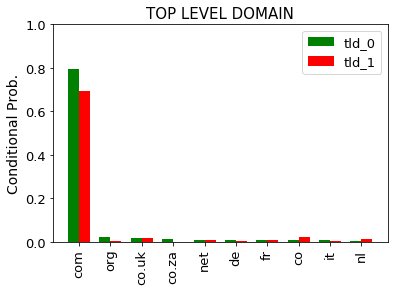

In [16]:
df = df_train[['txmer_merurl', 'url_0', 'url_1']].drop_duplicates(subset='txmer_merurl')
df = df.loc[df['txmer_merurl']!='eap:8080',:]
df = df.sort_values(by=['url_0', 'url_1'], ascending=False).head(10)
y1 = df['url_0']
y2 = df['url_1']
title = 'TOP LEVEL DOMAIN'
xlabels = df['txmer_merurl']
legstr = ('tld_0', 'tld_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

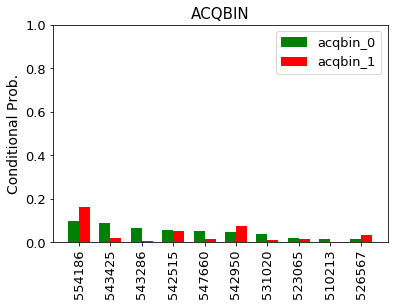

In [17]:
df = df_train[['fiacq_acqbin', 'acqbin_0', 'acqbin_1']].drop_duplicates(subset='fiacq_acqbin')
df = df.sort_values(by=['acqbin_0', 'acqbin_1'], ascending=False).head(10)
y1 = df['acqbin_0']
y2 = df['acqbin_1']
title = 'ACQBIN'
xlabels = df['fiacq_acqbin']
legstr = ('acqbin_0', 'acqbin_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

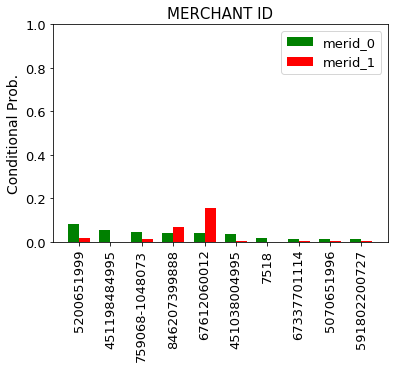

In [18]:
df = df_train[['txmer_merid', 'merid_0', 'merid_1']].drop_duplicates(subset='txmer_merid')
df = df.sort_values(by=['merid_0', 'merid_1'], ascending=False).head(10)
y1 = df['merid_0']
y2 = df['merid_1']
title = 'MERCHANT ID'
xlabels = list(map(lambda x: x.strip('0'), df['txmer_merid']))
legstr = ('merid_0', 'merid_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

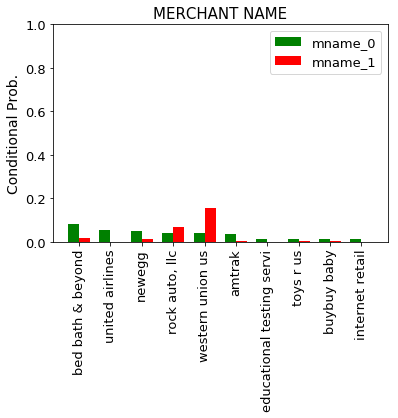

In [19]:
df = df_train[['txmer_mername', 'mname_0', 'mname_1']].drop_duplicates(subset='txmer_mername')
df = df.sort_values(by=['mname_0', 'mname_1'], ascending=False).head(10)
y1 = df['mname_0']
y2 = df['mname_1']
title = 'MERCHANT NAME'
xlabels = df['txmer_mername']
legstr = ('mname_0', 'mname_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

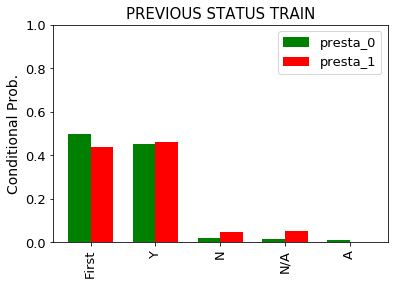

In [20]:
df = df_train[['pre_status', 'presta_0', 'presta_1']].drop_duplicates(subset='pre_status')
df = df.sort_values(by=['presta_0', 'presta_1'], ascending=False)
y1 = df['presta_0']
y2 = df['presta_1']
title = 'PREVIOUS STATUS TRAIN'
xlabels = df['pre_status'] #['Y', 'First', 'N/A', 'N', 'A'] #
legstr = ('presta_0', 'presta_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

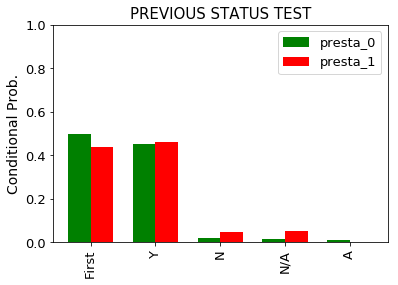

In [21]:
df = df_test[['pre_status', 'presta_0', 'presta_1']].drop_duplicates(subset='pre_status')
df = df.sort_values(by=['presta_0', 'presta_1'], ascending=False)
y1 = df['presta_0']
y2 = df['presta_1']
title = 'PREVIOUS STATUS TEST'
xlabels = df['pre_status'] #['Y', 'First', 'N/A', 'N', 'A'] #
legstr = ('presta_0', 'presta_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

In [22]:
#device check
filecsv = "/home/lijli06/Work/Bayes/FIFTHTHIRD/pgm/logNlst/dev_table.csv"
tempdf = pd.read_csv(filecsv)
print(tempdf)
tempdf = tempdf[['txrul_devicecheck', 'PCT_COL']]
df1 = tempdf.iloc[0::2, :]
df2 = tempdf.iloc[1::2, :]
df1 = df1.rename(index=str, columns={'PCT_COL':'devchk_0'})
df2 = df2.rename(index=str, columns={'PCT_COL':'devchk_1'})
df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)['devchk_1']], axis=1)
df[['devchk_0', 'devchk_1']] = df[['devchk_0', 'devchk_1']]/100

  txrul_devicecheck  mdtag_athctxn   COUNT  PERCENT  PCT_ROW  PCT_COL
0                NN              0  113874  58.2693  98.8309  59.1682
1                NN              1    1347   0.6893   1.1691  45.3688
2                YN              0   20350  10.4131  97.0943  10.5737
3                YN              1     609   0.3116   2.9057  20.5120
4                YY              0   58234  29.7983  98.2902  30.2580
5                YY              1    1013   0.5184   1.7098  34.1192


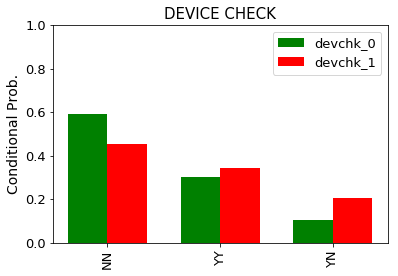

In [23]:
df = df.sort_values(by=['devchk_0', 'devchk_1'], ascending=False)
y1 = df['devchk_0']
y2 = df['devchk_1']
title = 'DEVICE CHECK'
xlabels = df['txrul_devicecheck']
legstr = ('devchk_0', 'devchk_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

In [24]:
#userknown
filecsv = "/home/lijli06/Work/Bayes/FIFTHTHIRD/pgm/logNlst/user_table.csv"
tempdf = pd.read_csv(filecsv)[['txrul_userknown', 'PCT_COL']]
df1 = tempdf.iloc[0::2, :]
df2 = tempdf.iloc[1::2, :]
df1 = df1.rename(index=str, columns={'PCT_COL':'userknown_0'})
df2 = df2.rename(index=str, columns={'PCT_COL':'userknown_1'})
df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)['userknown_1']], axis=1)
df[['userknown_0', 'userknown_1']] = df[['userknown_0', 'userknown_1']]/100

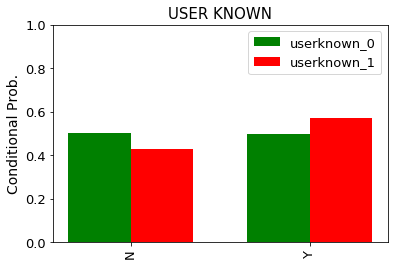

In [25]:
df = df.sort_values(by=['userknown_0', 'userknown_1'], ascending=False)
y1 = df['userknown_0']
y2 = df['userknown_1']
title = 'USER KNOWN'
xlabels = df['txrul_userknown']
legstr = ('userknown_0', 'userknown_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

In [26]:
#device country
filecsv = "/home/lijli06/Work/Bayes/FIFTHTHIRD/pgm/logNlst/cntry_table.csv"
tempdf = pd.read_csv(filecsv)[['txloc_devcntry', 'PCT_COL']]
df1 = tempdf.iloc[0::2, :]
df2 = tempdf.iloc[1::2, :]
df1 = df1.rename(index=str, columns={'PCT_COL':'devcntry_0'})
df2 = df2.rename(index=str, columns={'PCT_COL':'devcntry_1'})
df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)['devcntry_1']], axis=1)
df[['devcntry_0', 'devcntry_1']] = df[['devcntry_0', 'devcntry_1']]/100

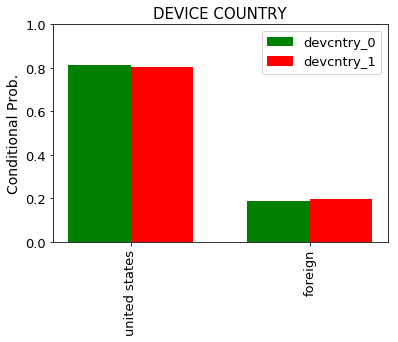

In [27]:
df = df.sort_values(by=['devcntry_0', 'devcntry_1'], ascending=False)
y1 = df['devcntry_0']
y2 = df['devcntry_1']
title = 'DEVICE COUNTRY'
xlabels = df['txloc_devcntry']
legstr = ('devcntry_0', 'devcntry_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

In [28]:
#acqbin change
filecsv = "/home/lijli06/Work/Bayes/FIFTHTHIRD/pgm/logNlst/acqbin_change_table.csv"
tempdf = pd.read_csv(filecsv)[['acqbin_change', 'PCT_COL']]
df1 = tempdf.iloc[0::2, :]
df2 = tempdf.iloc[1::2, :]
df1 = df1.rename(index=str, columns={'PCT_COL':'acqbinchg_0'})
df2 = df2.rename(index=str, columns={'PCT_COL':'acqbinchg_1'})
df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)['acqbinchg_1']], axis=1)
df[['acqbinchg_0', 'acqbinchg_1']] = df[['acqbinchg_0', 'acqbinchg_1']]/100
df['acqbin_change'] = df['acqbin_change'].astype(str)
# df[df['acqbin_change']=='-9'] = 'First Txn'
# df[df['acqbin_change']=='0'] = 'Same'
# df[df['acqbin_change']=='1'] = 'Different'
# df

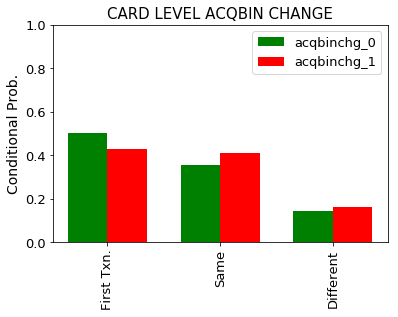

In [29]:
y1 = df['acqbinchg_0']
y2 = df['acqbinchg_1']
title = 'CARD LEVEL ACQBIN CHANGE'
xlabels = ['First Txn.', 'Same', 'Different']
legstr = ('acqbinchg_0', 'acqbinchg_1')
display_cond_prob(y1, y2, title, xlabels, legstr)

In [30]:
def TDRvsTOR(model, X_train, X_test, y_train, y_test):
    preds_train = model.predict_proba(X_train)[:,1]
    preds_test = model.predict_proba(X_test)[:,1] 
    
    fpr_train, tpr_train, thres_train = roc_curve(y_train, preds_train)
    fpr_test, tpr_test, thres_test   = roc_curve(y_test, preds_test)
    
    tp_train = y_train.sum()*tpr_train
    fp_train = (len(y_train)-y_train.sum())*fpr_train
    fn_train = y_train.sum() - tp_train
    tn_train = (len(y_train)-y_train.sum()) - fp_train
    
    tp_test = y_test.sum()*tpr_test
    fp_test = (len(y_test)-y_test.sum())*fpr_test
    fn_test = y_test.sum() - tp_test
    tn_test = (len(y_test)-y_test.sum()) - fp_test
    
    tdr_train = tp_train/y_train.sum()
    tor_train = (tp_train+fp_train)/len(y_train)
    
    tdr_test = tp_test/y_test.sum()
    tor_test = (tp_test+fp_test)/len(y_test) 
    
    auc_train = auc(tor_train, tdr_train)
    auc_test = auc(tor_test, tdr_test)
    
    #TDR vs TOR
    fig=plt.figure()
    
    plt.plot(tor_train, tdr_train, 'r-', label='Train, auc={:.3f}'.format(auc_train))
    plt.plot(tor_test, tdr_test, 'g-', label='Test, auc={:.3f}'.format(auc_test))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('TOR', fontsize=15)
    plt.ylabel('TDR', fontsize=15)
    plt.legend(loc=4, fontsize=14)
    fig.gca().tick_params(labelsize=13)
    plt.show()
    
    #TOR vs score
    plt.figure()
    
    plt.plot(thres_train*1000, tor_train*100, 'r-', label='Train')
    plt.plot(thres_test*1000, tor_test*100, 'g-', label='Test')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1000,0,100])
    plt.ylabel('TOR (%)')
    plt.xlabel('Score')
    plt.legend(loc=4)
    plt.show()


In [31]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, n_jobs=16, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=16, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

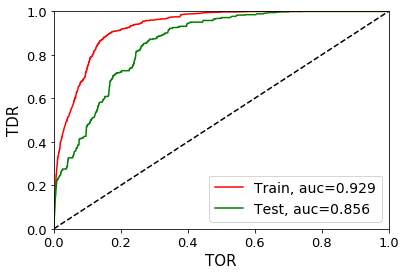

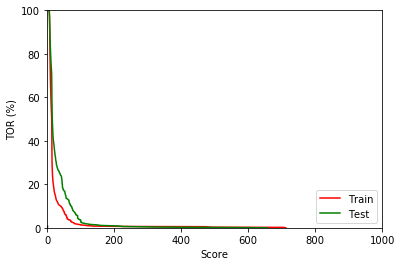

In [32]:
TDRvsTOR(rf, X_train, X_test, y_train, y_test)

In [33]:
#randomforests without previous transaction status
rf1 = RandomForestClassifier(n_estimators=100, max_depth=4, n_jobs=16, random_state=123)
rf1.fit(X_train1, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=16, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

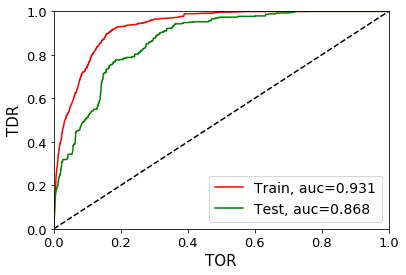

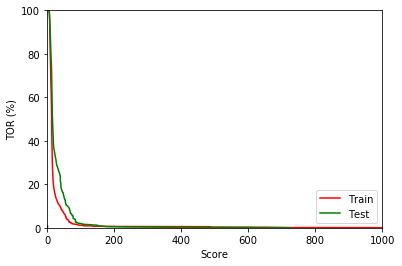

In [34]:
#randomforests without previous transaction status
TDRvsTOR(rf1, X_train1, X_test1, y_train, y_test)

In [35]:
def display_feature_importance(feature_importance):    
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0])
    
    sort_feats = []
    for idx in sorted_idx:
        sort_feats.append(feats[idx])
       
    fig = plt.figure(figsize=(6,9))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, sort_feats)
    plt.title('Feature Importance',fontsize=15)
    plt.xlabel('Ranking', fontsize=14)
    fig.gca().tick_params(labelsize=13)
    plt.show()

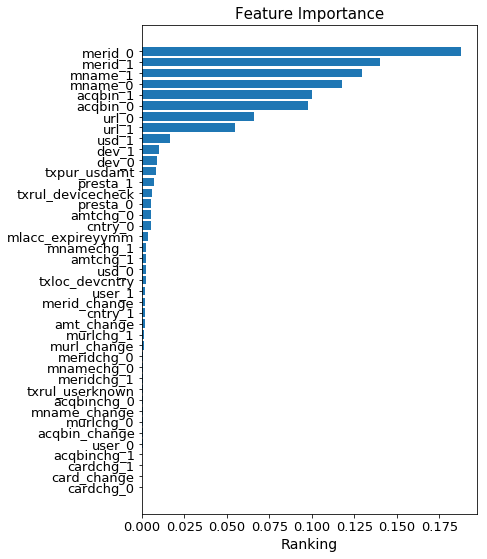

In [36]:
feature_importance = rf.feature_importances_
display_feature_importance(feature_importance)

In [41]:
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=4, random_state=123)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False)

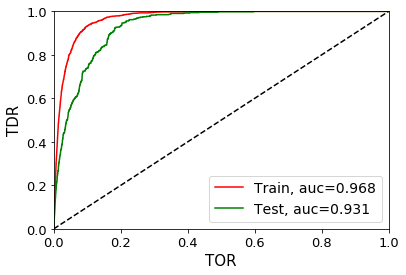

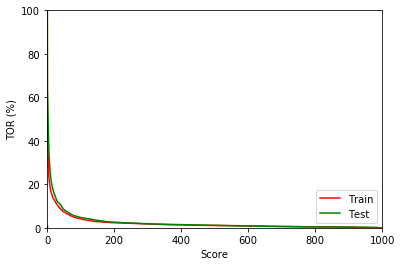

In [42]:
TDRvsTOR(gbc, X_train, X_test, y_train, y_test)

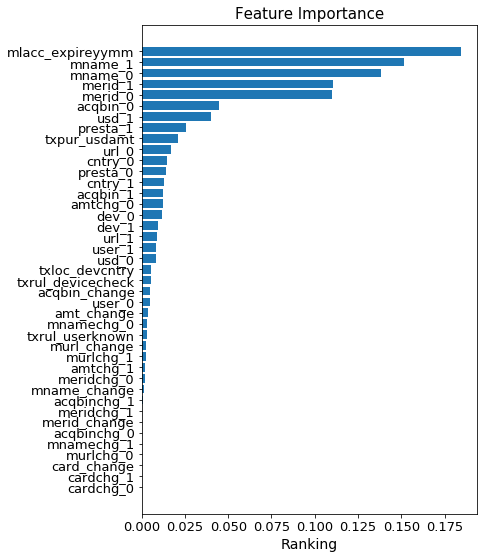

In [43]:
feature_importance = gbc.feature_importances_
display_feature_importance(feature_importance)

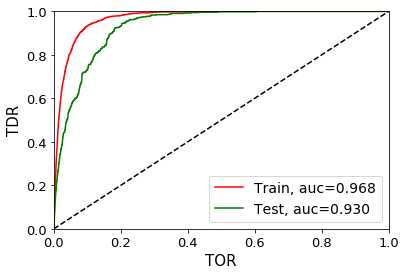

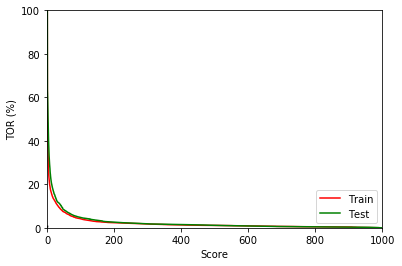

In [45]:
#using the NB features of pre status calculated on July itself
X_test2 = df_test[feats1+['presta_s0', 'presta_s1']].as_matrix()
TDRvsTOR(gbc, X_train, X_test2, y_train, y_test)